In [236]:
import numpy as np
import networkx as nx
from scipy.optimize import minimize
from scipy.spatial import distance_matrix

In [237]:
def negloglik(params, X):
  """
  Compute the negative log-likelihood of the latent space model.

  Parameters
  ----------
  params : array-like
    The last parameter is the alpha parameter, the rest are the
    2D coordinates of the latent positions.
  X : array-like
    The adjacency matrix of the graph.

  Returns
  -------
  ll : float
    The negative log-likelihood of the latent space model.
  """
  *latent_pos, alpha = params

  # Reshape the latent positions
  latent_pos = np.array(latent_pos).reshape(-1, 2)
  print("-" * 10)
  # print(X.shape, latent_pos.shape, alpha)

  # Compute the distance between each pair of points
  latent_dist = distance_matrix(latent_pos, latent_pos)
  
  # Compute the negative log-likelihood
  ll_mat = X * (alpha - latent_dist) - np.log(1 + np.exp(alpha - latent_dist))
  print(ll_mat)
  ll = -np.sum(ll_mat)
  print(ll)
  return ll


def lsm(X):
  """
  Compute the latent space model for a given matrix X.
  """
  latent_pos_size = (5, 2)
  latent_pos_init = np.random.normal(size=latent_pos_size)
  alpha_init = 0.5
  params = np.concatenate([latent_pos_init.flatten(), [alpha_init]])
  out = minimize(fun=negloglik, x0=params, args=X)
  return out


mat = np.array(
  [
    [0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0],
  ]
)

# Generate a random symmetric matrix
n = 5
triangular = np.triu(np.random.randint(0, 2, size=(n, n)), k=1)
mat = triangular + triangular.T
print(mat)
sol = lsm(X=mat)


[[0 0 0 0 1]
 [0 0 1 0 1]
 [0 1 0 0 1]
 [0 0 0 0 1]
 [1 1 1 1 0]]
----------
0.5 
 [[-0.04689864  0.74568178]
 [-0.8762588   0.17527246]
 [-0.36791113  1.08426046]
 [ 0.36479027  1.23405882]
 [-0.22517606  1.58996605]]
[[-0.97407698 -0.47159752 -0.71000352 -0.62617731 -0.89097049]
 [-0.47159752 -0.97407698 -1.00009684 -0.27960292 -1.35549113]
 [-0.71000352 -1.00009684 -0.97407698 -0.576878   -0.70595977]
 [-0.62617731 -0.27960292 -0.576878   -0.97407698 -0.79210934]
 [-0.89097049 -1.35549113 -0.70595977 -0.79210934 -0.97407698]]
19.68815856931872
----------
0.5 
 [[-0.04689862  0.74568178]
 [-0.8762588   0.17527246]
 [-0.36791113  1.08426046]
 [ 0.36479027  1.23405882]
 [-0.22517606  1.58996605]]
[[-0.97407698 -0.47159751 -0.71000351 -0.62617731 -0.89097049]
 [-0.47159751 -0.97407698 -1.00009684 -0.27960292 -1.35549113]
 [-0.71000351 -1.00009684 -0.97407698 -0.576878   -0.70595977]
 [-0.62617731 -0.27960292 -0.576878   -0.97407698 -0.79210934]
 [-0.89097049 -1.35549113 -0.70595977 -0.7

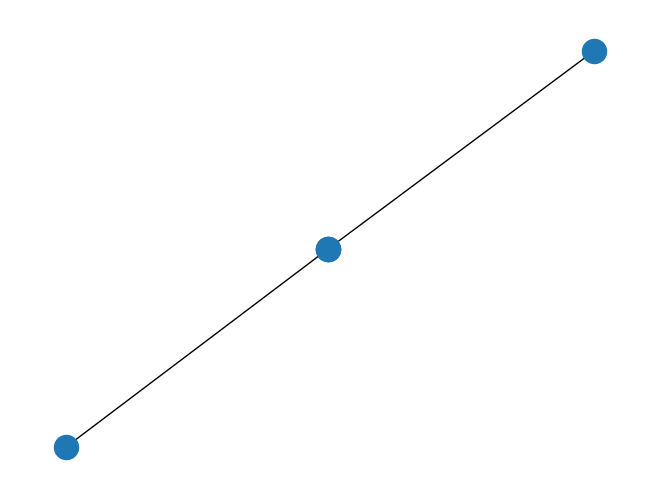

In [240]:
*latent_pos, alpha = sol.x
latent_pos = np.array(latent_pos).reshape(-1, 2)

# plot graph with nx from coordinates
G = nx.from_numpy_matrix(mat)
pos = {i: latent_pos[i] for i in range(len(latent_pos))}
nx.draw(G, pos=pos)
# nx.draw(G)

In [239]:
latent_pos

array([[-0.39346665, -0.16689697],
       [-0.23115007,  0.96473055],
       [-0.23115105,  0.96473181],
       [-0.06632964,  2.09669861],
       [-0.23115214,  0.96472875]])